<a href="https://colab.research.google.com/github/vishalkotwal/swabhav-techlabs/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv('train.csv')

In [61]:
df.head()

,Id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25611,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,26010,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,40194,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,297,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,36344,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no


##DATA ANALYSIS

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32950 non-null  int64  
 1   age             32950 non-null  int64  
 2   job             32950 non-null  object 
 3   marital         32950 non-null  object 
 4   education       32950 non-null  object 
 5   default         32950 non-null  object 
 6   housing         32950 non-null  object 
 7   loan            32950 non-null  object 
 8   contact         32950 non-null  object 
 9   month           32950 non-null  object 
 10  day_of_week     32950 non-null  object 
 11  duration        32950 non-null  int64  
 12  campaign        32950 non-null  int64  
 13  pdays           32950 non-null  int64  
 14  previous        32950 non-null  int64  
 15  poutcome        32950 non-null  object 
 16  emp.var.rate    32950 non-null  float64
 17  cons.price.idx  32950 non-null 

In [63]:
#It seems no null values then
df.describe()

,Id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,20618.796601,40.014112,258.127466,2.560607,962.052413,0.174719,0.080470,93.575881,-40.508489,3.618395,5166.899651
std,11899.673392,10.403636,258.975917,2.752326,187.951096,0.499025,1.571266,0.579209,4.628223,1.735896,72.434812
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10315.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20632.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30952.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##SOME VISUALIZATION OF DATA

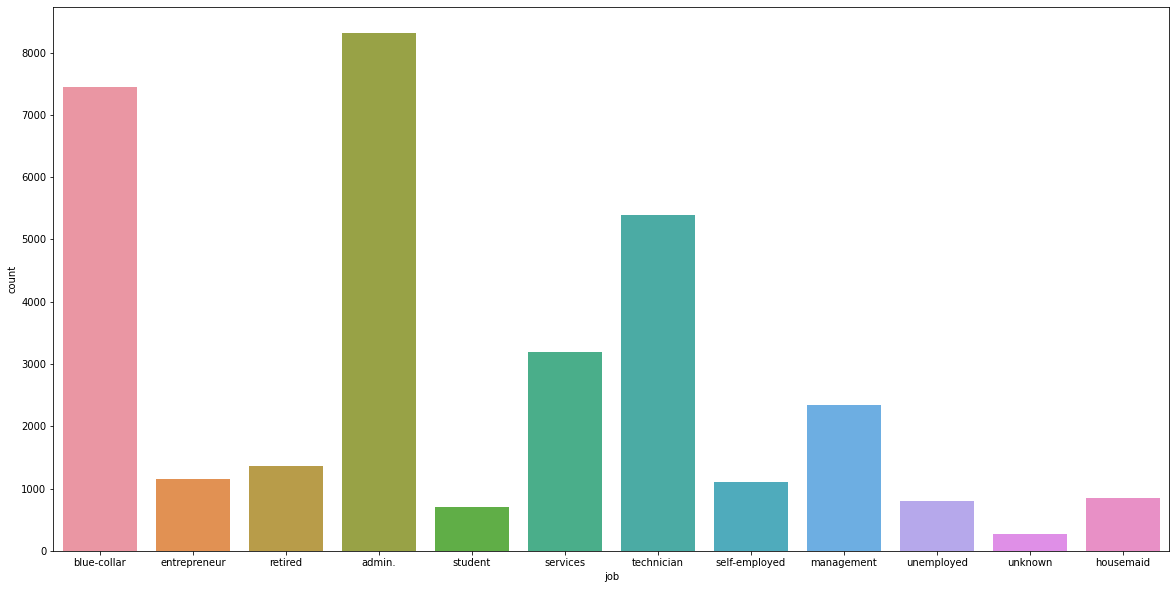

In [64]:
plt.figure(figsize=(20,10))
sns.countplot(x='job',data = df)

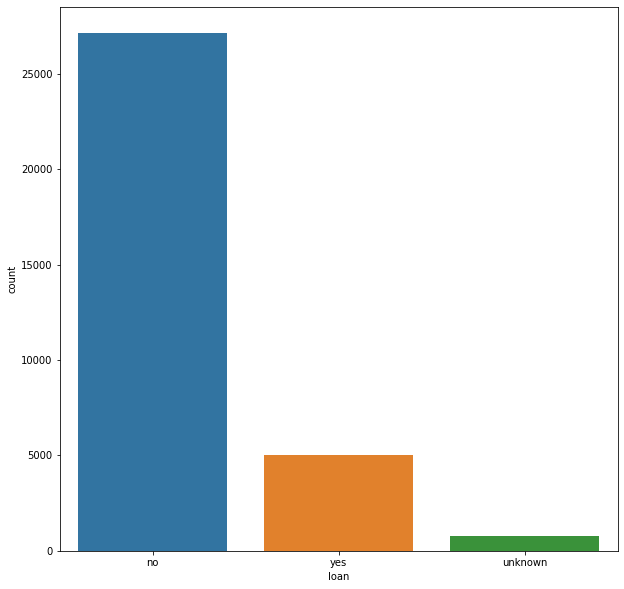

In [65]:
plt.figure(figsize=(10,10))
sns.countplot(x='loan',data=df)

##IDENTIFYING THE OUTLYERS of continuous data and converting them

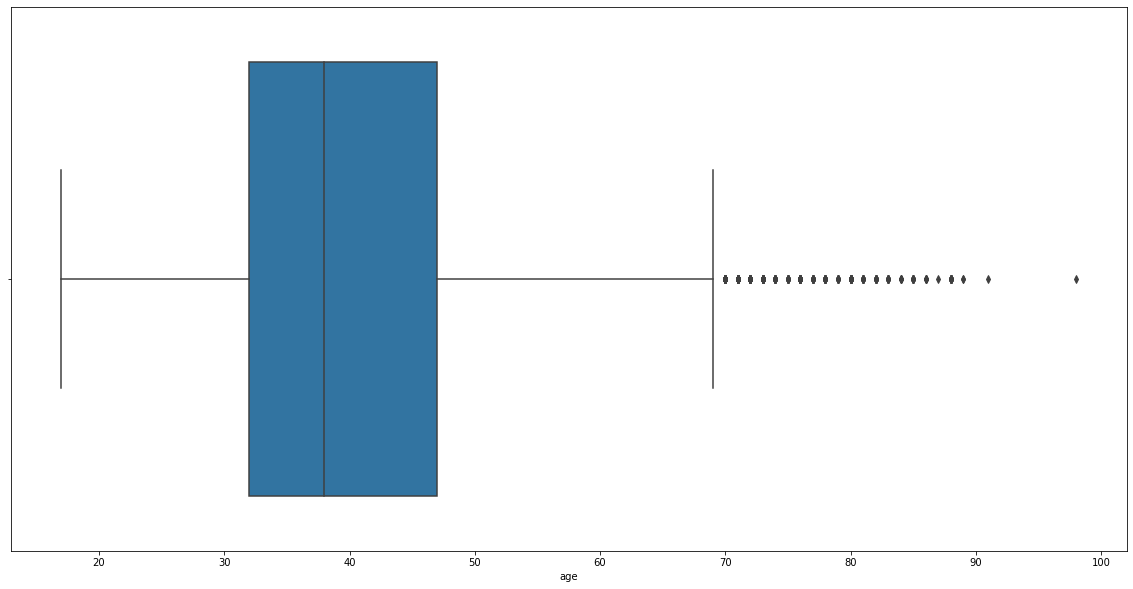

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age',data=df)

In [67]:
#there are outliyers in the data we should convert
q1=df['age'].quantile(q=.25)
q3=df['age'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df=df[df['age']<upper_limit] 
df=df[df['age']>lower_limit]

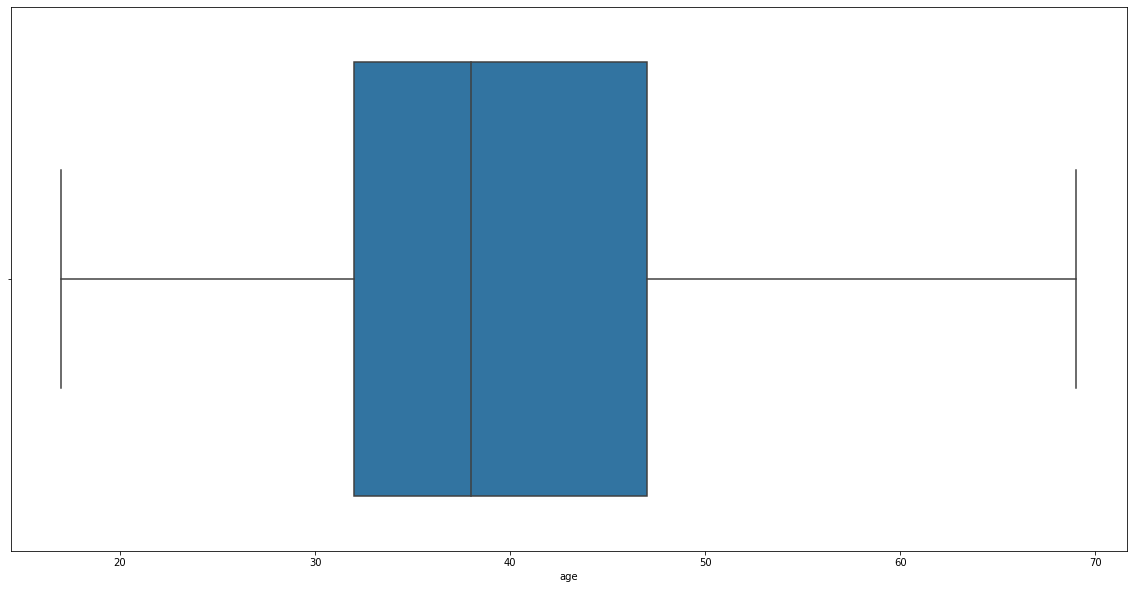

In [68]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age',data=df)

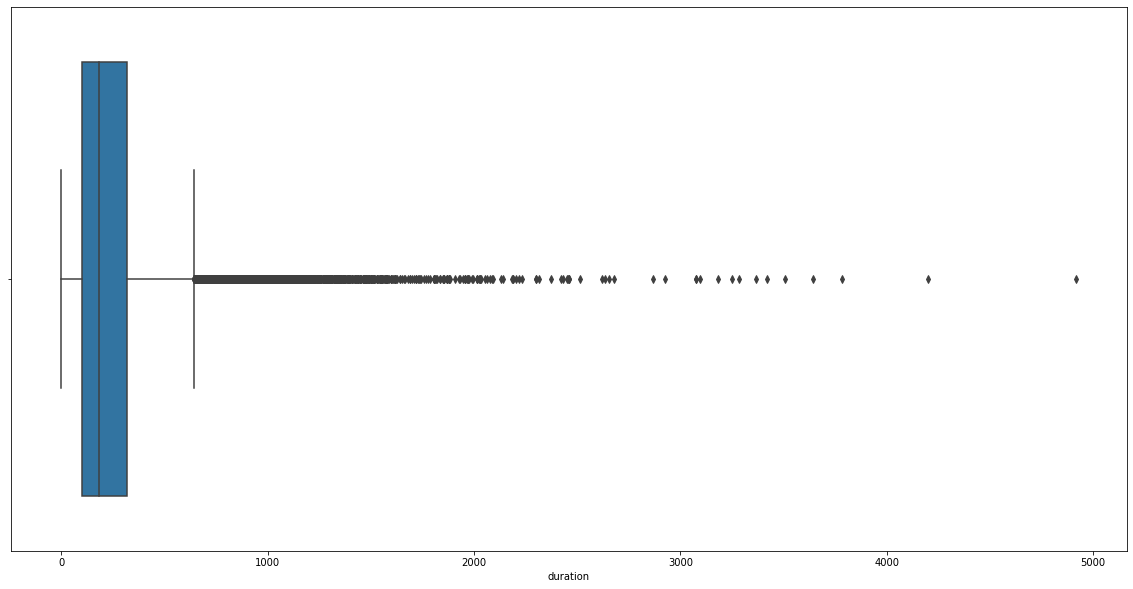

In [69]:
#similarly 
plt.figure(figsize=(20,10))
sns.boxplot(x='duration',data=df)

In [70]:
q1=df['duration'].quantile(q=.25)
q3=df['duration'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df=df[df['duration']<upper_limit] 
df=df[df['duration']>lower_limit] 

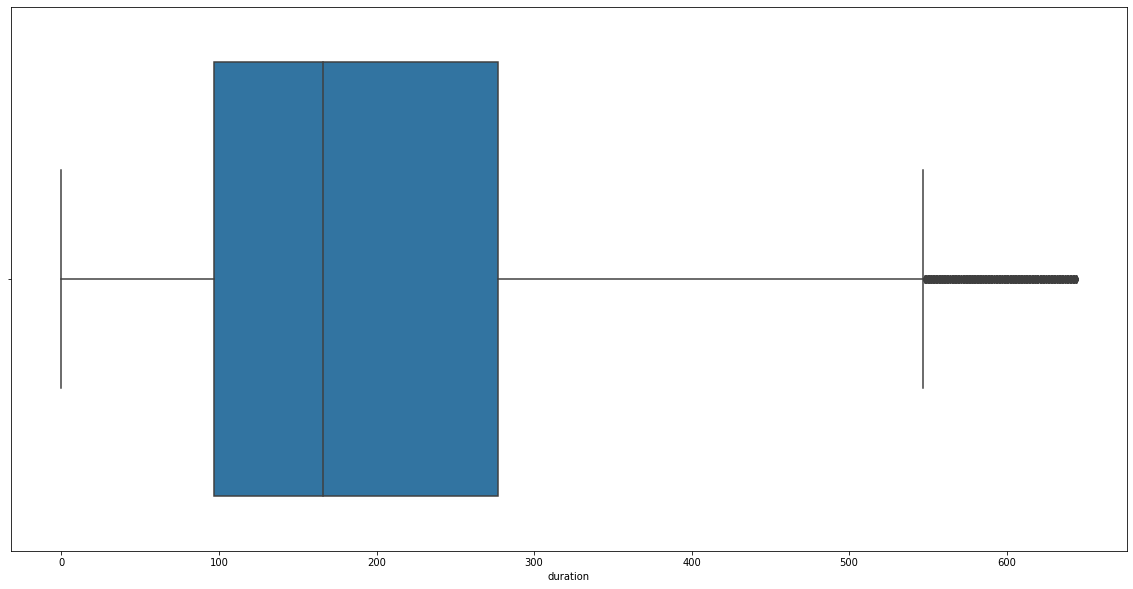

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(x='duration',data=df)

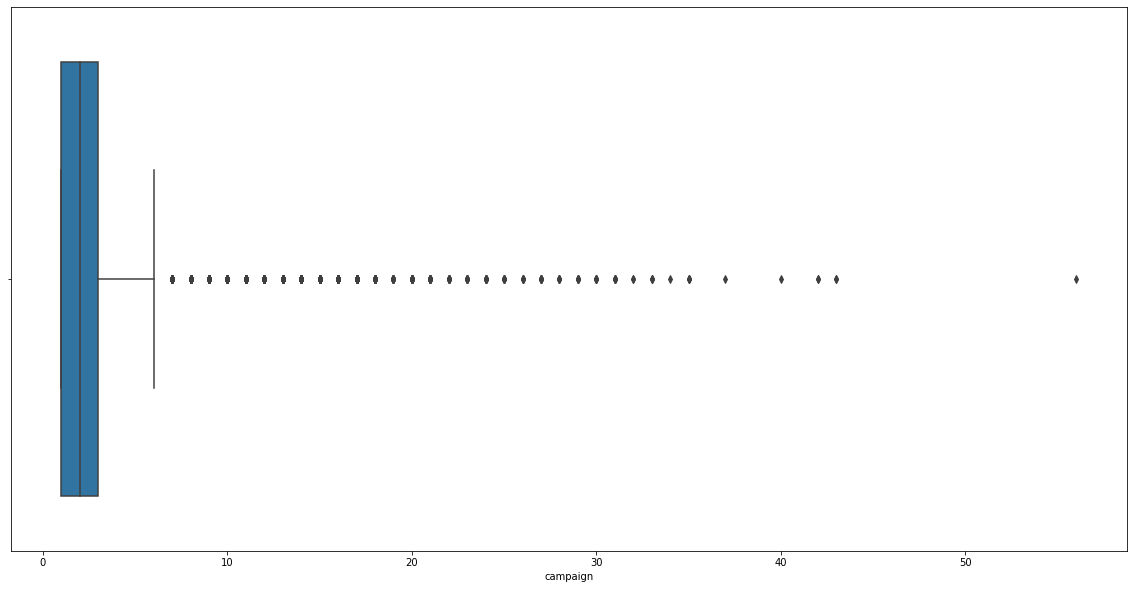

In [72]:
plt.figure(figsize=(20,10))
sns.boxplot(x='campaign',data=df)

In [73]:
q1=df['campaign'].quantile(q=.25)
q3=df['campaign'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df=df[df['campaign']<upper_limit] 
df=df[df['campaign']>lower_limit] 

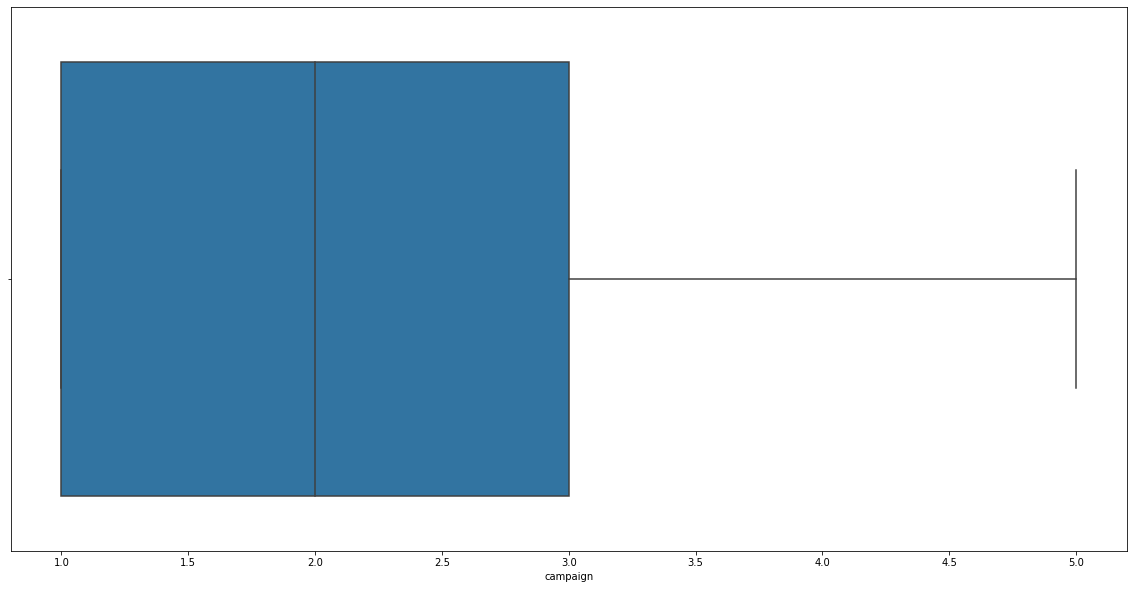

In [74]:
plt.figure(figsize=(20,10))
sns.boxplot(x='campaign',data=df)

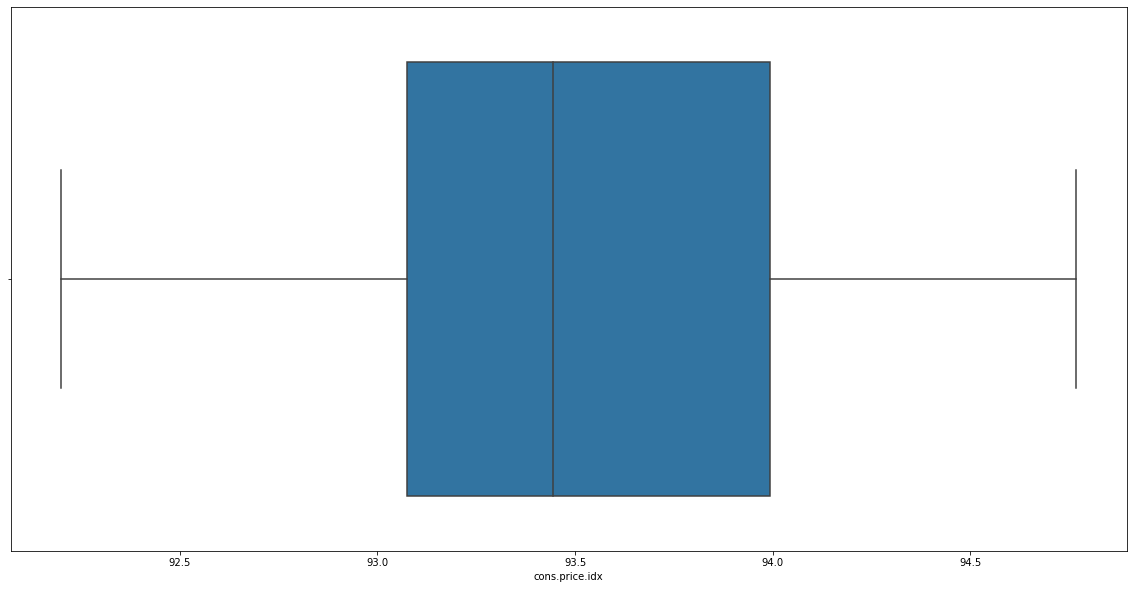

In [75]:
plt.figure(figsize=(20,10))
sns.boxplot(x='cons.price.idx',data=df)

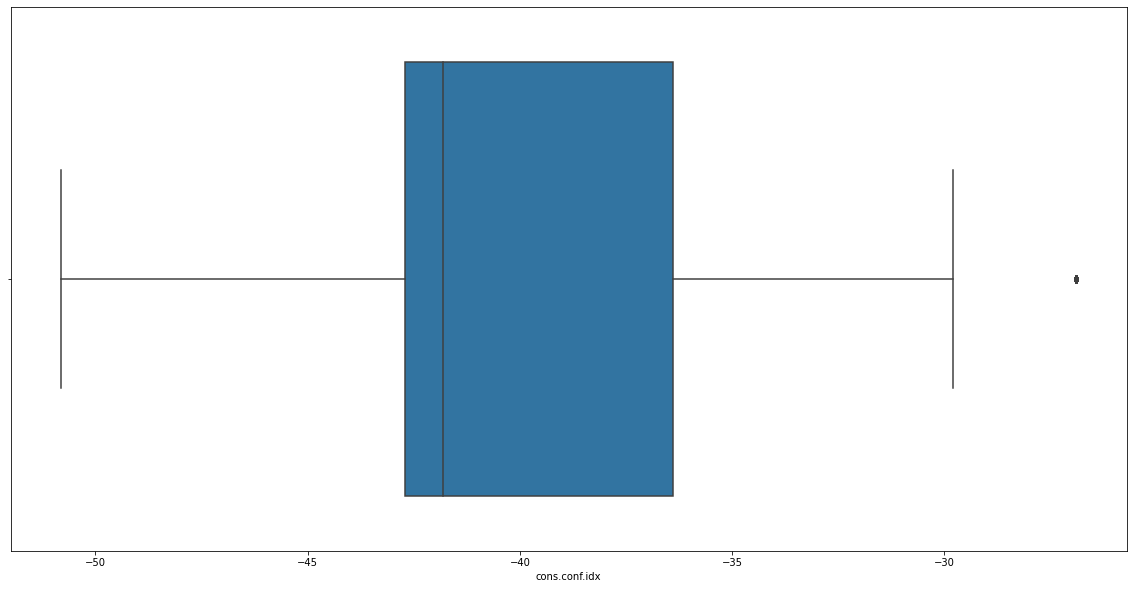

In [76]:

plt.figure(figsize=(20,10))
sns.boxplot(x='cons.conf.idx',data=data)

In [77]:
q1=df['cons.conf.idx'].quantile(q=.25)
q3=df['cons.conf.idx'].quantile(q=.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df=df[df['cons.conf.idx']<upper_limit] 
df=df[df['cons.conf.idx']>lower_limit]

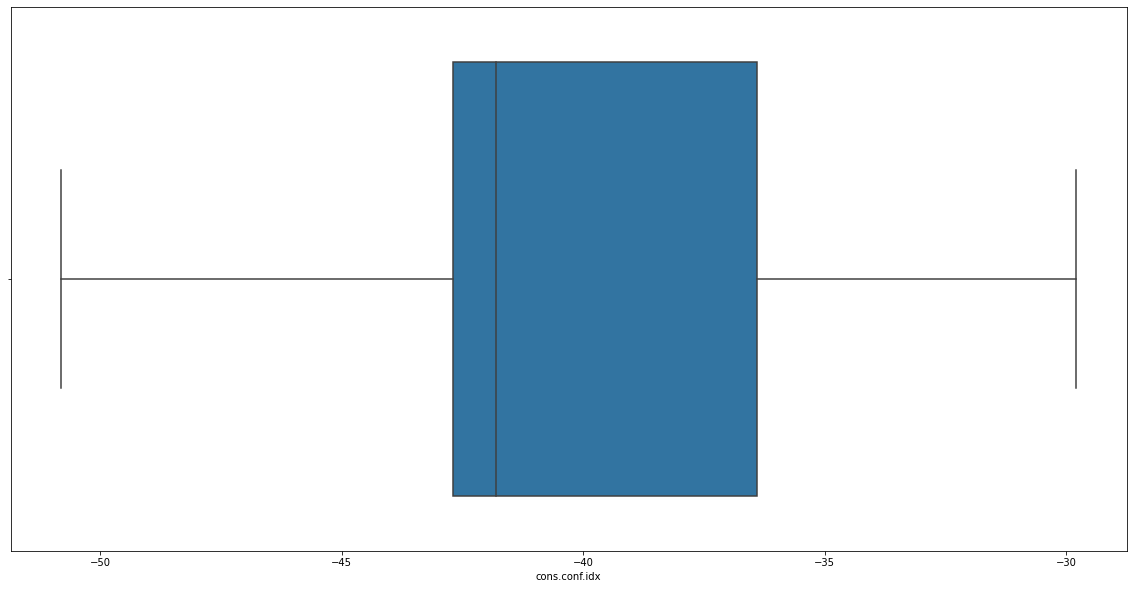

In [78]:
plt.figure(figsize=(20,10))
sns.boxplot(x='cons.conf.idx',data=df)

In [84]:
X=data.drop(columns=['Id','campaign','emp.var.rate','cons.price.idx','euribor3m','nr.employed','y'],axis=1)
Y=data['y']

In [85]:
X = pd.get_dummies(X)

In [86]:
X

,age,duration,pdays,previous,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,49,227.0,999.0,0.0,-42.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,37,202.0,999.0,1.0,-42.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
3,36,120.0,999.0,0.0,-36.4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,59,368.0,999.0,0.0,-40.8,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
5,29,256.0,999.0,0.0,-36.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24052,44,168.0,999.0,0.0,-36.1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
24053,52,454.0,999.0,0.0,-36.1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
24054,30,155.0,999.0,1.0,-46.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
24055,34,98.0,999.0,0.0,-34.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


##Train test split

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [91]:
from sklearn import tree

In [92]:
model = tree.DecisionTreeClassifier()

In [93]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##Testing the accuracy

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
y_pred = model.predict(x_test)

In [96]:
print(accuracy_score(y_test,y_pred))

0.905961224859576


In [97]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(y_test,y_pred)

array([[4806,  256],
       [ 263,  194]])

In [100]:
def print_scores(actual,prediction):
  cm = confusion_matrix(actual,prediction)
  tp = cm[1,1]
  tn = cm[0,0]
  fp = cm[0,1]
  fn = cm[1,0]
  print('Overall Accuaracy  : ',(tp+tn)/(tp+tn+fp+fn))
  print('Precision  : ',tp/(tp+fp))
  print('Recall or TPR or Sensitivity : ',tp/(tp+fn))
  print('specificity or TNR : ',tn/(tn+fp))

In [101]:
print_scores(y_test,y_pred)

Overall Accuaracy  :  0.905961224859576
Precision  :  0.4311111111111111
Recall or TPR or Sensitivity :  0.424507658643326
specificity or TNR :  0.9494271039114974
